In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from activ import load_data
import pandas as pd
from activ.analytics import outcomes_histogram
from matplotlib.backends.backend_pdf import PdfPages

/Users/ahyeon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata.shape

(586, 919)

In [4]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [5]:
sub6mo = [61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,93,94]
full6mo = [446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,478,479]

In [6]:
sub_oc[:,61]

array([0., 0., 0., 1., 0., 3., 0., 0., 2., 0., 0., 4., 2., 2., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 2., 2., 0., 3., 3., 1., 1., 0., 0., 0., 0.,
       0., 0., 2., 1., 1., 2., 0., 0., 0., 0., 0., 0., 1., 2., 1., 2., 1.,
       0., 0., 1., 0., 4., 0., 0., 0., 2., 0., 0., 1., 2., 0., 1., 2., 4.,
       0., 1., 3., 0., 0., 2., 0., 2., 3., 1., 0., 2., 0., 1., 1., 3., 4.,
       0., 0., 2., 1., 1., 0., 1., 2., 0., 2., 1., 2., 2., 2., 4., 1., 1.,
       2., 1., 1., 2., 4., 1., 3., 3., 1., 3., 0., 0., 0., 3., 2., 0., 0.,
       0., 0., 0., 1., 3., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       2., 0., 3., 0., 4., 0., 1., 2., 2., 0., 0., 2., 0., 0., 2., 3., 0.,
       0., 1., 2., 0., 2., 1., 0., 2., 0., 0., 0., 4., 0., 2., 3., 0., 3.,
       1., 3., 2., 4., 3., 2., 0., 0., 1., 3., 1., 2., 0., 0., 2., 1., 3.,
       4., 0., 1., 0., 0., 3., 2., 2., 4., 0., 0., 3., 0., 0., 4., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 2., 3., 2., 0.,
       0., 0., 2., 0., 2.

In [7]:
dat1 = sub_oc[:,61]
dat1

array([ 0.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,  2.,  0.,  0.,  4.,  2.,
        2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,
        3.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,
        2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  2.,  1.,  0.,
        0.,  1.,  0.,  4.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  2.,  0.,
        1.,  2.,  4.,  0.,  1.,  3.,  0.,  0.,  2.,  0.,  2.,  3.,  1.,
        0.,  2.,  0.,  1.,  1.,  3.,  4.,  0.,  0.,  2.,  1.,  1.,  0.,
        1.,  2.,  0.,  2.,  1.,  2.,  2.,  2.,  4.,  1.,  1.,  2.,  1.,
        1.,  2.,  4.,  1.,  3.,  3.,  1.,  3.,  0.,  0.,  0.,  3.,  2.,
        0.,  0.,  0.,  0.,  0.,  1.,  3.,  3.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  3.,  0.,  4.,  0.,  1.,
        2.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  2.,
        0.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  4.,  0.,  2.,  3.,  0.,
        3.,  1.,  3.,  2.,  4.,  3.,  2.,  0.,  0.,  1.,  3.,  1

In [8]:
dat = fulldata.iloc[:,446]
dat.isna().sum()

246

ind16 13.75
ind17 61.25


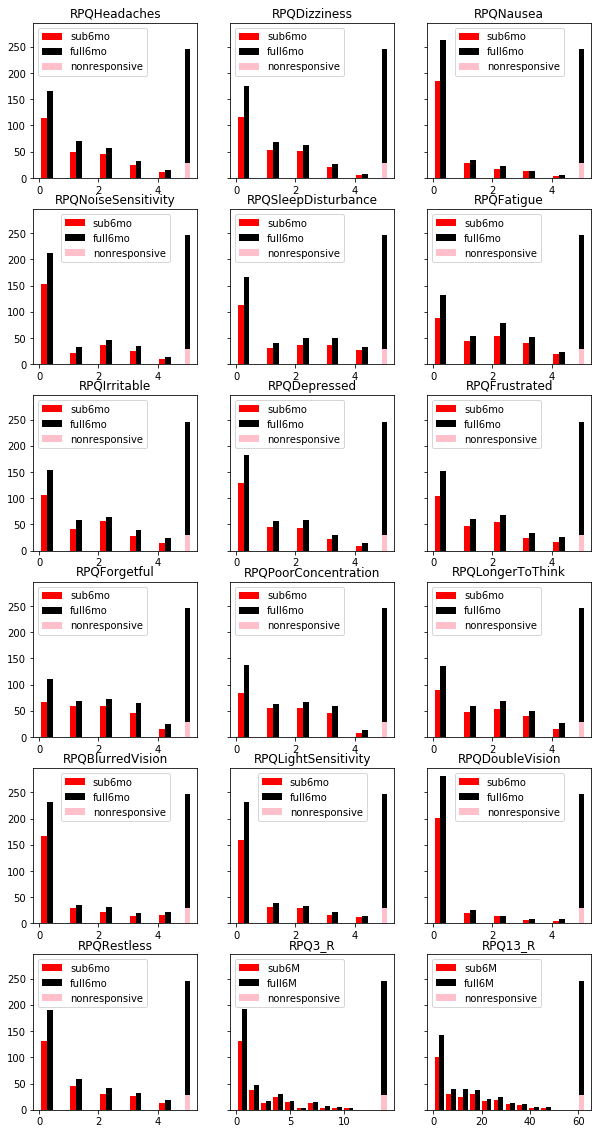

In [33]:
sub6mo = [61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76]
full6mo = [446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461]
fig, ax = plt.subplots(6,3,sharey=True,figsize=(10,20))
ax = ax.flatten()
count = 0
names = ['RPQHeadaches','RPQDizziness','RPQNausea','RPQNoiseSensitivity',
         'RPQSleepDisturbance','RPQFatigue','RPQIrritable','RPQDepressed','RPQFrustrated',
        'RPQForgetful','RPQPoorConcentration','RPQLongerToThink','RPQBlurredVision','RPQLightSensitivity',
        'RPQDoubleVision','RPQRestless']

for x, y, name in zip(sub6mo, full6mo, names):
    sub = sub_oc[:,x]
    full6 = fulldata.iloc[:,y]
    
    num_na = full6.isna().sum()
    nonresponsive = 29

    dat_dropna = full6.dropna()
    counts, bins, bars = ax[count].hist([sub, dat_dropna], color=['red','black'], label=['sub6mo', 'full6mo'], bins=np.arange(0,5,0.5))
    
    length = (bins[1]-bins[0])/3
    
    mx = max(dat_dropna)
    na_index = mx*(1+1/4) 
   
    ax[count].bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
    ax[count].bar(na_index, num_na-nonresponsive, color='black', bottom = nonresponsive, width=length)
    ax[count].legend()
    ax[count].set_title(name)
    count += 1
    
ax[16].hist([sub_oc[:,93], fulldata.iloc[:,478]],label=['sub6M','full6M'], color=['red','black'])
na_16 = fulldata.iloc[:,478].isna().sum()
ind16 = max(fulldata.iloc[:,478].dropna())*(1+1/4)
print("ind16", ind16)
ax[16].bar(ind16, nonresponsive, color='pink', label='nonresponsive', width=0.5)
ax[16].bar(ind16, na_16-nonresponsive, color='black', bottom = nonresponsive, width=0.5)
ax[16].set_title('RPQ3_R')
ax[16].legend()

ax[17].hist([sub_oc[:,94], fulldata.iloc[:,479]],label=['sub6M','full6M'], color=['red','black'])
na_17 = fulldata.iloc[:,479].isna().sum()
ind17 = max(fulldata.iloc[:,479].dropna())*(1+1/4)
print("ind17", ind17)
ax[17].bar(ind17, nonresponsive, color='pink', label='nonresponsive', width=2)
ax[17].bar(ind17, na_17-nonresponsive, color='black', bottom = nonresponsive, width=2)
ax[17].set_title('RPQ13_R')
ax[17].legend()
plt.savefig('/Users/ahyeon/Desktop/activ misc/rpq_hist.pdf')

In [5]:
for ii,o in enumerate(fulldata.columns):
    if 'RPQ' in o:
        print(ii,o) 

446 RPQHeadaches_6mo
447 RPQDizziness_6mo
448 RPQNausea_6mo
449 RPQNoiseSensitivity_6mo
450 RPQSleepDisturbance_6mo
451 RPQFatigue_6mo
452 RPQIrritable_6mo
453 RPQDepressed_6mo
454 RPQFrustrated_6mo
455 RPQForgetful_6mo
456 RPQPoorConcentration_6mo
457 RPQLongerToThink_6mo
458 RPQBlurredVision_6mo
459 RPQLightSensitivity_6mo
460 RPQDoubleVision_6mo
461 RPQRestless_6mo
462 RPQHeadaches_6mo_R
463 RPQDizziness_6mo_R
464 RPQNausea_6mo_R
465 RPQNoiseSensitivity_6mo_R
466 RPQSleepDisturbance_6mo_R
467 RPQFatigue_6mo_R
468 RPQIrritable_6mo_R
469 RPQDepressed_6mo_R
470 RPQFrustrated_6mo_R
471 RPQForgetful_6mo_R
472 RPQPoorConcentration_6mo_R
473 RPQLongerToThink_6mo_R
474 RPQBlurredVision_6mo_R
475 RPQLightSensitivity_6mo_R
476 RPQDoubleVision_6mo_R
477 RPQRestless_6mo_R
478 RPQ3_6mo_R
479 RPQ13_6mo_R


In [7]:
for ii,f in enumerate(sub_oc_features):
    if 'RPQ' in f:
        print(f,ii)

RPQHeadaches_6mo 61
RPQDizziness_6mo 62
RPQNausea_6mo 63
RPQNoiseSensitivity_6mo 64
RPQSleepDisturbance_6mo 65
RPQFatigue_6mo 66
RPQIrritable_6mo 67
RPQDepressed_6mo 68
RPQFrustrated_6mo 69
RPQForgetful_6mo 70
RPQPoorConcentration_6mo 71
RPQLongerToThink_6mo 72
RPQBlurredVision_6mo 73
RPQLightSensitivity_6mo 74
RPQDoubleVision_6mo 75
RPQRestless_6mo 76
RPQHeadaches_6mo_R 77
RPQDizziness_6mo_R 78
RPQNausea_6mo_R 79
RPQNoiseSensitivity_6mo_R 80
RPQSleepDisturbance_6mo_R 81
RPQFatigue_6mo_R 82
RPQIrritable_6mo_R 83
RPQDepressed_6mo_R 84
RPQFrustrated_6mo_R 85
RPQForgetful_6mo_R 86
RPQPoorConcentration_6mo_R 87
RPQLongerToThink_6mo_R 88
RPQBlurredVision_6mo_R 89
RPQLightSensitivity_6mo_R 90
RPQDoubleVision_6mo_R 91
RPQRestless_6mo_R 92
RPQ3_6mo_R 93
RPQ13_6mo_R 94


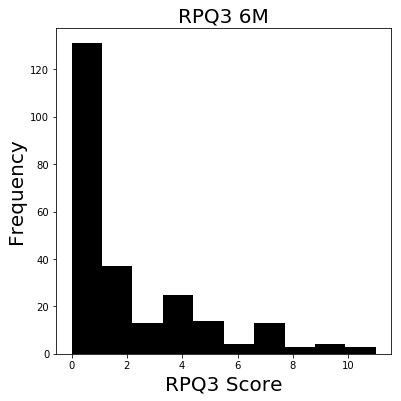

In [10]:
plt.figure(figsize=(6,6))
plt.hist(sub_oc[:,93], color='black')
plt.title('RPQ3 6M', fontsize=20)
plt.xlabel('RPQ3 Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/rpq3_hist.pdf')
plt.show()

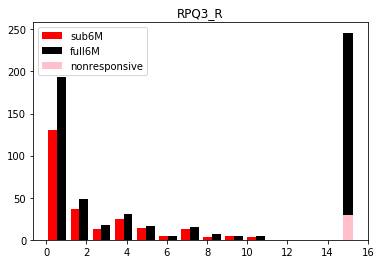

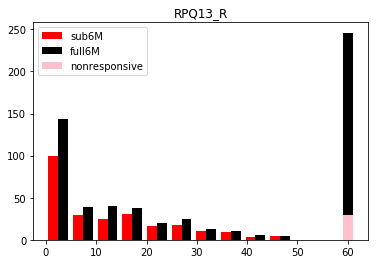

In [38]:
plt.hist([sub_oc[:,93], fulldata.iloc[:,478]],label=['sub6M','full6M'], color=['red','black'])
na_16 = fulldata.iloc[:,478].isna().sum()
plt.bar(15, nonresponsive, color='pink', label='nonresponsive', width=0.5)
plt.bar(15, na_16-nonresponsive, color='black', bottom = nonresponsive, width=0.5)
plt.title('RPQ3_R')
plt.legend()
plt.show()

plt.hist([sub_oc[:,94], fulldata.iloc[:,479]],label=['sub6M','full6M'], color=['red','black'])
na_17 = fulldata.iloc[:,479].isna().sum()
plt.bar(60, nonresponsive, color='pink', label='nonresponsive', width=2)
plt.bar(60, na_17-nonresponsive, color='black', bottom = nonresponsive, width=2)
plt.title('RPQ13_R')
plt.legend()
plt.show()

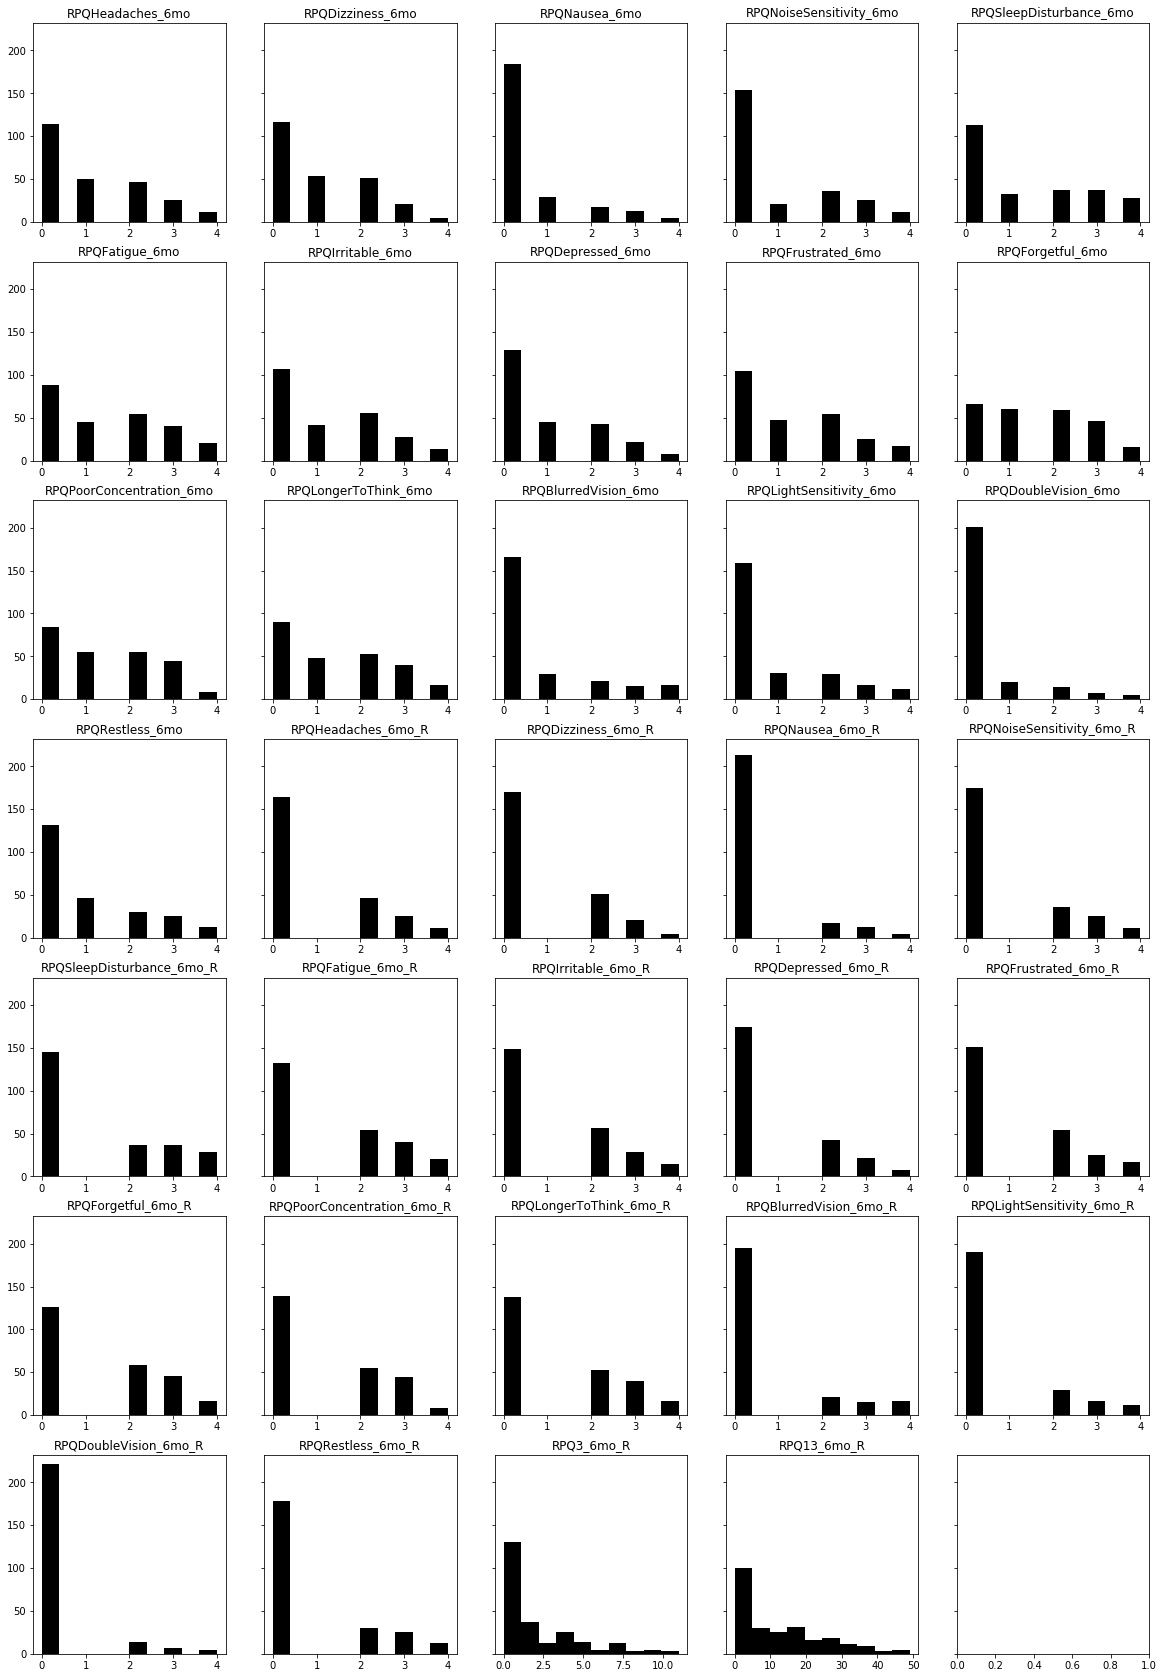

In [5]:
outcomes_histogram(oc, oc_features, indices, nrows=7, ncols=5, figsize=(20,30))
plt.savefig('/Users/ahyeon/Desktop/activ misc/rpq_hist.pdf')

In [7]:
#PCL
indices_PCL = []
for ii,o in enumerate(oc_features):
    if 'PCL' in o:
        print(ii,o)
        indices_PCL.append(ii)

119 PCLImages_6mo
120 PCLDreams_6mo
121 PCLFeeling_6mo
122 PCLVeryUpset_6mo
123 PCLPhysicalReactions_6mo
124 PCLThinking_6mo
125 PCLActivities_6mo
126 PCLRemembering_6mo
127 PCLLossOfInterest_6mo
128 PCLDistant_6mo
129 PCLEmotionallyNumb_6mo
130 PCLFuture_6mo
131 PCLAsleep_6mo
132 PCLIrritable_6mo
133 PCLConcentrating_6mo
134 PCLSuperAlert_6mo
135 PCLJumpy_6mo
140 PCLTotalScore_6mo


In [23]:
len(indices_PCL)
indices_PCL

[119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 140]

In [36]:
def outcomes_histogram_pcl(oc_data, oc_features, indices, bins, nrows=1, ncols=1, figsize=(6,6)):
    fig, ax = plt.subplots(nrows,ncols,sharey=True,figsize=figsize)
    ax = ax.flatten()
    count = 0
    
    for ii, ind in enumerate(indices[:-1]):
        data = oc_data[:,ind]
        name = oc_features[ind]
        ax[count].hist(data, bins = bins, color='black')
        ax[count].set_title('{}'.format(name))
        count += 1
    ax[17].hist(oc_data[:,140], color='black')
    ax[17].set_title('PCLTotalScore_6mo')
    ax[17].set_xlabel('17-84 (higher = more PTSD symptoms)')
    ax[17].text(40,150,'Summary plot', color='red')


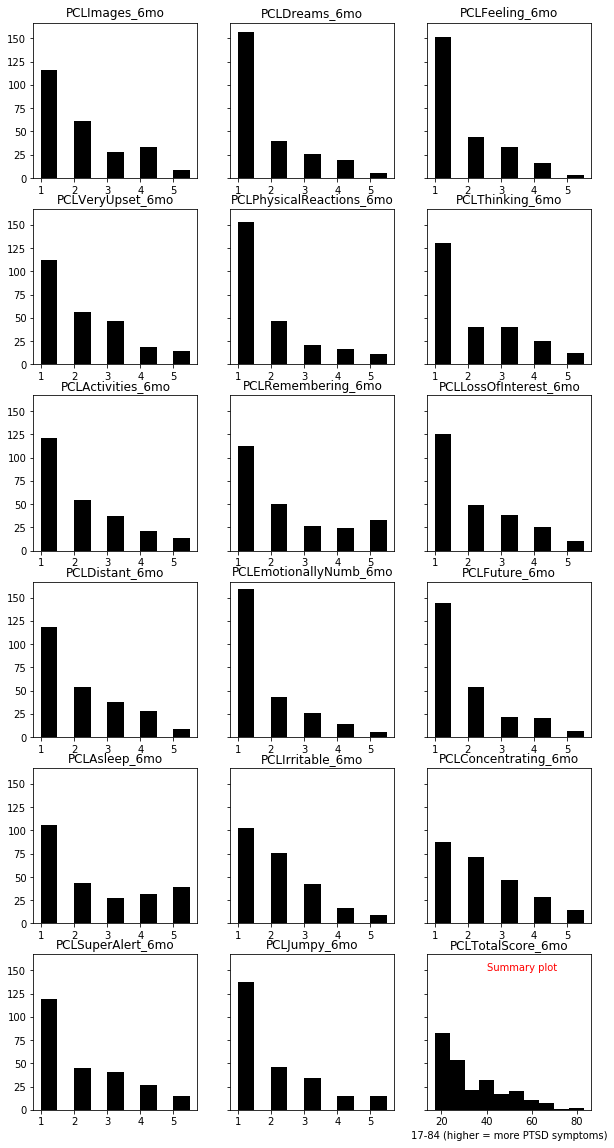

In [37]:
outcomes_histogram_pcl(oc, oc_features, indices_PCL, bins = np.arange(1,6,0.5), nrows=6, ncols=3, figsize=(10,20))
plt.savefig('/Users/ahyeon/Desktop/activ misc/pcl_hist.pdf')

In [60]:
#PTSD
indices_PTSD = []
for ii,o in enumerate(oc_features):
    if 'PTSD' in o:
        print(ii,o)
        indices_PTSD.append(ii)

136 PTSD_Reexperience_Sum_6mo
137 PTSD_Avoidance_Sum_6mo
138 PTSD_Hypervigilance_Sum_6mo
139 PTSD_6mo


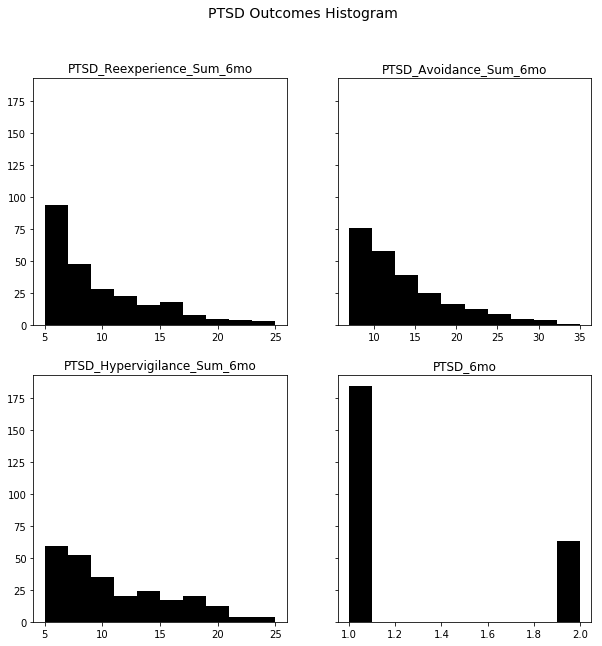

In [61]:
fig = outcomes_histogram('PTSD Outcomes Histogram', oc, oc_features, indices_PTSD, nrows=2, ncols=2, figsize=(10,10))
pdf.savefig(fig)

In [6]:
#CHARTS
indices_CHARTS = []
for ii,o in enumerate(oc_features):
    if 'CHARTS' in o:
        print(ii,o)
        indices_CHARTS.append(ii)

95 CHARTSFAssistUnpaidHours_6mo
96 CHARTSFInHomeAssistTime_6mo
97 CHARTSFOutHomeAssistTime_6mo
98 CHARTSFOutOfBedHours_6mo
99 CHARTSFOutOfHouseDays_6mo
100 CHARTSFAwayFromHomeNights_6mo
101 CHARTSFStudyHours_6mo
102 CHARTSFHomemakingHours_6mo
103 CHARTSFMaintenanceHours_6mo
104 CHARTSFLiveWith_6mo
105 CHARTSFContactAssociates_6mo
106 CHARTSFContactFriends_6mo
107 CHARTSFContactStrangers_6mo
108 CHARTSFPhysicalTotal_6mo
109 CHARTSFCognitiveTotal_6mo
110 CHARTSFMobilityTotal_6mo
111 CHARTSFOccupationTotal_6mo
112 CHARTSFSocialIntegrationTotal_6mo


In [7]:
len(indices_CHARTS)

18

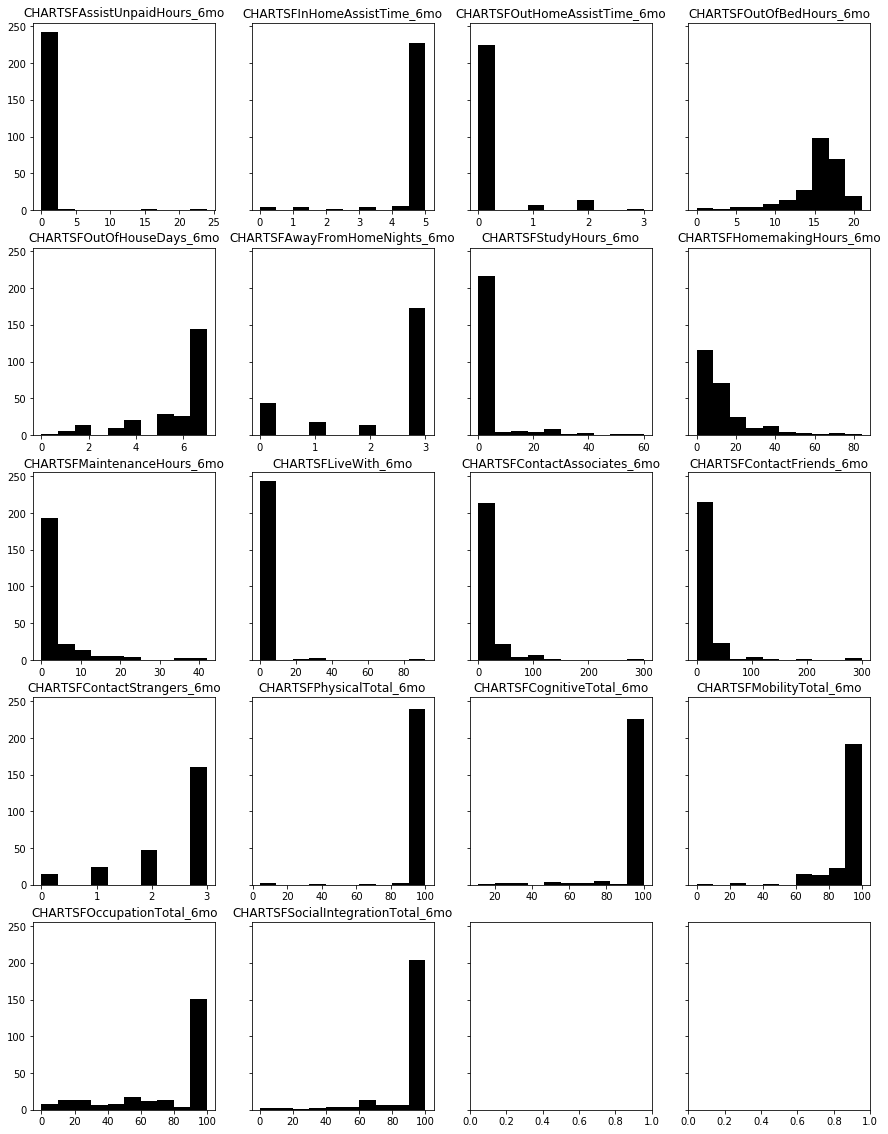

In [8]:
outcomes_histogram(oc, oc_features, indices_CHARTS, nrows=5, ncols=4, figsize=(15,20))
plt.savefig('/Users/ahyeon/Desktop/activ misc/charts_hist.pdf')

In [65]:
pdf.close()